In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
# from chesster.camera.realSense import RealSenseCamera
#
# camera = RealSenseCamera()

In [3]:
# img = camera.capture_color()
# gray = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# plt.axis('off')
# plt.imshow(gray)


In [4]:
def plot(img, convert=True):
    plt.axis('off')
    plt.imshow(img if not convert else cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

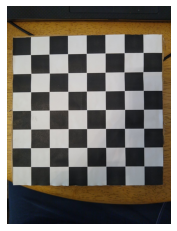

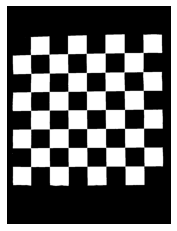

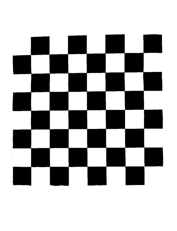

[[[799.      275.     ]]

 [[798.      388.     ]]

 [[799.53705 498.38354]]

 [[801.5     608.5    ]]

 [[801.5994  720.05963]]

 [[803.3563  831.3537 ]]

 [[804.      941.5    ]]

 [[687.6836  276.69565]]

 [[687.0993  389.9608 ]]

 [[689.      499.     ]]

 [[690.5     609.5    ]]

 [[690.5     720.5    ]]

 [[691.2791  831.2791 ]]

 [[692.66077 941.359  ]]

 [[576.7742  278.77417]]

 [[576.7742  390.22583]]

 [[576.2258  500.22583]]

 [[578.      610.     ]]

 [[579.      721.     ]]

 [[580.14746 832.22577]]

 [[581.2791  942.2791 ]]

 [[466.      280.     ]]

 [[466.22583 392.22583]]

 [[467.5     502.     ]]

 [[468.      611.5    ]]

 [[469.      722.     ]]

 [[469.5     832.5    ]]

 [[470.72092 943.27905]]

 [[357.60117 282.61084]]

 [[358.3929  395.6514 ]]

 [[359.      503.     ]]

 [[359.      612.5    ]]

 [[359.22583 722.2258 ]]

 [[359.22583 833.7742 ]]

 [[360.9672  944.4579 ]]

 [[248.      285.     ]]

 [[250.      396.     ]]

 [[248.22583 504.77417]]

 [[250.3652 

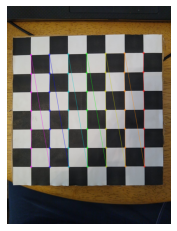

In [5]:
img = cv.imread('img/chess.jpg')
plot(img)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
lwr = np.array([0, 0, 143])
upr = np.array([179, 61, 252])
msk = cv.inRange(hsv, lwr, upr)
plot(msk)


krn = cv.getStructuringElement(cv.MORPH_RECT, (50, 30))
dlt = cv.dilate(msk, krn, iterations=5)
res = 255 - cv.bitwise_and(dlt, msk)
plot(res)


res = np.uint8(res)
ret, corners = cv.findChessboardCorners(res, (7, 7), flags=cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_FAST_CHECK + cv.CALIB_CB_NORMALIZE_IMAGE)

if ret:
    print(corners)
    fnl = cv.drawChessboardCorners(img, (7, 7), corners, ret)
    plt.axis('off')
    plot(fnl)
else:
    print('Not checkerboard found!')